In [92]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC                            # Import SVM model using guassian
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Model

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics                            # import metrics modules for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
import joblib

In [93]:
# Read data
PATH = "../../my_data/identification-dataset/my_custom_data/anblock-error-dataset.csv"
df = pd.read_csv(PATH)

# Drop uncomplete rows
df.dropna(inplace=True)

In [94]:
material_names = df.material.unique()
material_names

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

In [95]:
# Set training data
train_df = df.drop('material', axis=1)

# Extracted features 
X = train_df.drop('encoded_material', axis=1)
y = train_df['encoded_material'] # Labels

In [96]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

## SVM

In [97]:
# Create a pipeline object for our model SVM using rbf kernel
pipe_SVM = make_pipeline(StandardScaler(),
                            SVC(kernel='rbf',
                                C=1000, #10**3
                                cache_size=2000,
                                verbose=0)
                        )

In [98]:
pipe_SVM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, cache_size=2000, verbose=0))])

In [99]:
y_pred = pipe_SVM.predict(X_test)

In [100]:
# Evaluate the pipeline and store the results
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
precision_svm = metrics.precision_score(y_test, y_pred, average="macro")
recall_svm = metrics.recall_score(y_test, y_pred, average="macro")
f1_svm = metrics.recall_score(y_test, y_pred, average="macro")

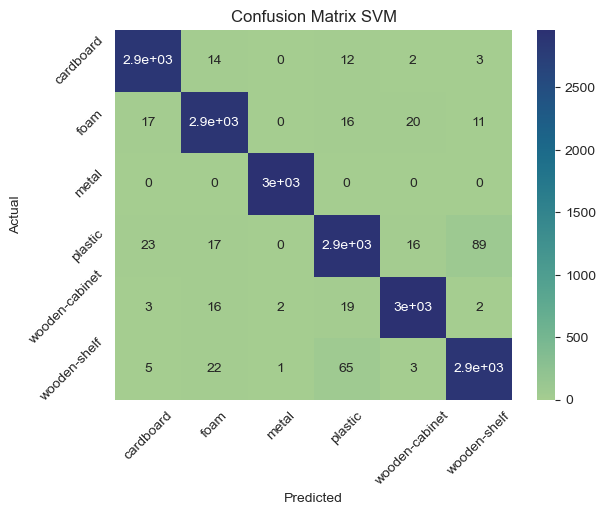

In [101]:
cm_svm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap_svm = sns.heatmap(cm_svm, annot=True, xticklabels=material_names, yticklabels=material_names, cmap="crest")

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap_svm.set_xticklabels(heatmap_svm.get_xticklabels(), rotation=45)
heatmap_svm.set_yticklabels(heatmap_svm.get_yticklabels(), rotation=45)

plt.title('Confusion Matrix SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [102]:
report_svm = classification_report(y_test, y_pred)
print(report_svm)

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      2904
           2       0.98      0.98      0.98      2957
           3       1.00      1.00      1.00      2951
           4       0.96      0.95      0.96      3064
           5       0.99      0.99      0.99      3001
           6       0.96      0.97      0.97      2984

    accuracy                           0.98     17861
   macro avg       0.98      0.98      0.98     17861
weighted avg       0.98      0.98      0.98     17861



In [103]:
f1_scores_svm =[0.99, 0.98, 1.00, 0.96, 0.99, 0.97] 

## MLP

In [104]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                        MLPClassifier(solver='adam',
                                    activation='relu',
                                    
                                    hidden_layer_sizes=(50, 50),
                                    random_state=0,
                                    max_iter=500           # TODO: tune it later
                                    # verbose=True
                                    )
                        )

In [105]:
pipe_MLP.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500,
                               random_state=0))])

In [106]:
y_pred = pipe_MLP.predict(X_test)

In [107]:
# Evaluate the pipeline and store the results
accuracy_mlp = metrics.accuracy_score(y_test, y_pred)
precision_mlp = metrics.precision_score(y_test, y_pred, average="macro")
recall_mlp = metrics.recall_score(y_test, y_pred, average="macro")
f1_mlp = metrics.recall_score(y_test, y_pred, average="macro")

In [108]:
f1_mlp

0.9888587211889329

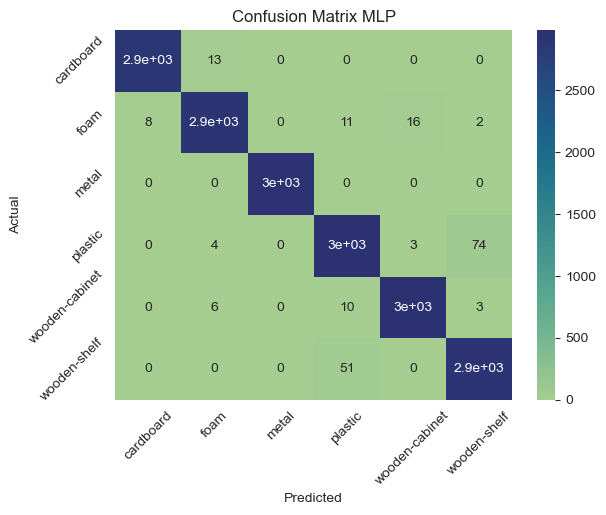

In [109]:
cm_mlp = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap_mlp = sns.heatmap(cm_mlp, annot=True, xticklabels=material_names, yticklabels=material_names, cmap="crest")

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap_mlp.set_xticklabels(heatmap_mlp.get_xticklabels(), rotation=45)
heatmap_mlp.set_yticklabels(heatmap_mlp.get_yticklabels(), rotation=45)
plt.title('Confusion Matrix MLP')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [110]:
report_mlp = classification_report(y_test, y_pred)
print(report_mlp)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2904
           2       0.99      0.99      0.99      2957
           3       1.00      1.00      1.00      2951
           4       0.98      0.97      0.97      3064
           5       0.99      0.99      0.99      3001
           6       0.97      0.98      0.98      2984

    accuracy                           0.99     17861
   macro avg       0.99      0.99      0.99     17861
weighted avg       0.99      0.99      0.99     17861



In [111]:
f1_scores_mlp =[1.00, 0.99, 1.00, 0.98, 0.99, 0.98]

## RF

In [112]:
pipe_RF = make_pipeline(StandardScaler(),
        RandomForestClassifier(n_estimators=500,   # no. of decision trees in the forest
                                verbose=0)
        )

In [113]:
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500))])

In [114]:
y_pred = pipe_RF.predict(X_test)

In [115]:
# Evaluate the pipeline and store the results
accuracy_rf = metrics.accuracy_score(y_test, y_pred)
precision_rf = metrics.precision_score(y_test, y_pred, average="macro")
recall_rf = metrics.recall_score(y_test, y_pred, average="macro")
f1_rf = metrics.recall_score(y_test, y_pred, average="macro")

In [116]:
f1_rf

0.9182698663505143

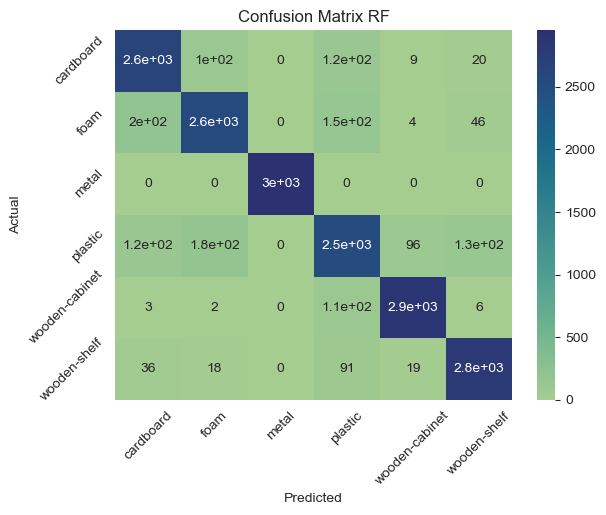

In [117]:
cm_rf = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap_rf = sns.heatmap(cm_rf, annot=True, xticklabels=material_names, yticklabels=material_names, cmap="crest")

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap_rf.set_xticklabels(heatmap_rf.get_xticklabels(), rotation=45)
heatmap_rf.set_yticklabels(heatmap_rf.get_yticklabels(), rotation=45)
plt.title('Confusion Matrix RF')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [118]:
report_rf = classification_report(y_test, y_pred)
print(report_rf)

              precision    recall  f1-score   support

           1       0.88      0.91      0.90      2904
           2       0.89      0.87      0.88      2957
           3       1.00      1.00      1.00      2951
           4       0.84      0.83      0.84      3064
           5       0.96      0.96      0.96      3001
           6       0.93      0.95      0.94      2984

    accuracy                           0.92     17861
   macro avg       0.92      0.92      0.92     17861
weighted avg       0.92      0.92      0.92     17861



In [119]:
f1_scores_rf =[0.89, 0.88, 1.00, 0.83, 0.96, 0.94] 

In [120]:
f1_scores_rf_dict = {key: value for key, value in zip(material_names.tolist(), f1_scores_rf)}
f1_scores_rf_dict

{'cardboard': 0.89,
 'foam': 0.88,
 'metal': 1.0,
 'plastic': 0.83,
 'wooden-cabinet': 0.96,
 'wooden-shelf': 0.94}

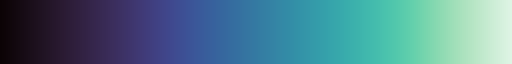

In [121]:

sns.set_style("darkgrid")
sns.color_palette("mako", as_cmap=True)

<Axes: >

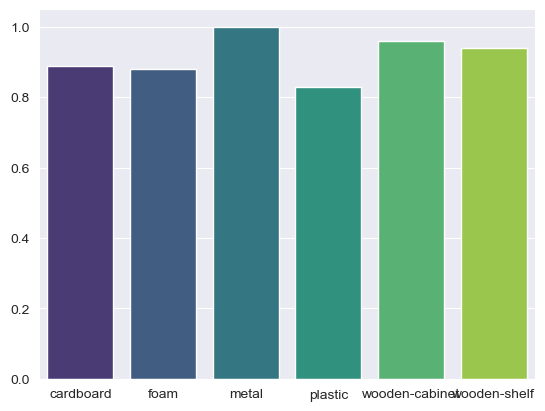

In [122]:
sns.barplot(x=material_names, y=f1_scores_rf, edgecolor='white', palette="viridis")

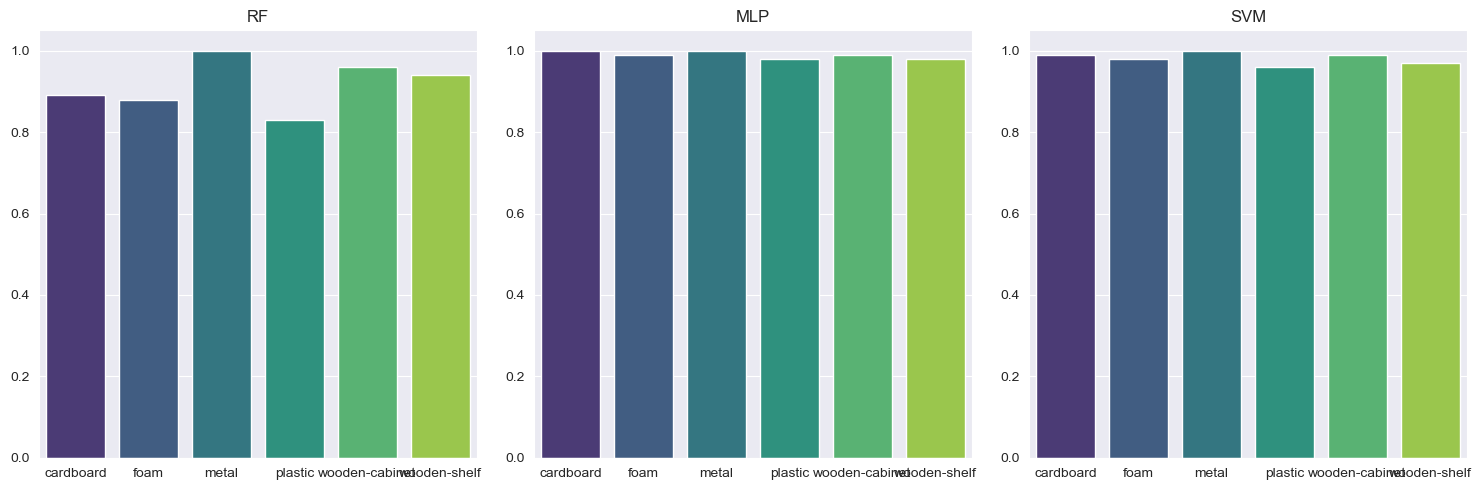

In [123]:
# Example dictionaries for each subplot
data1 = {'A': 10, 'B': 20, 'C': 15, 'D': 25}
data2 = {'E': 18, 'F': 22, 'G': 12, 'H': 28}
data3 = {'I': 14, 'J': 24, 'K': 16, 'L': 30}

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot for the first subplot
sns.barplot(x=material_names, y=f1_scores_rf, edgecolor='white', palette="viridis", ax=axes[0])
axes[0].set_title('RF')  # Set title for subplot 1

# Plot for the second subplot
sns.barplot(x=material_names, y=f1_scores_mlp, edgecolor='white', palette="viridis", ax=axes[1])
axes[1].set_title('MLP')  # Set title for subplot 2

# Plot for the third subplot
sns.barplot(x=material_names, y=f1_scores_svm, edgecolor='white', palette="viridis", ax=axes[2])
axes[2].set_title('SVM')  # Set title for subplot 3

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [124]:
# Create a pandas DataFrame
data = {'Material': material_names, 'SVM': f1_scores_svm, 'MLP': f1_scores_mlp, 'RF': f1_scores_rf}
f1_df = pd.DataFrame(data)
f1_df

,Material,SVM,MLP,RF
0,cardboard,0.99,1.00,0.89
1,foam,0.98,0.99,0.88
2,metal,1.00,1.00,1.00
3,plastic,0.96,0.98,0.83
4,wooden-cabinet,0.99,0.99,0.96
5,wooden-shelf,0.97,0.98,0.94


In [176]:
material_names

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

In [182]:
data_df = pd.DataFrame(columns=material_names)
# Append rows to the DataFrame
data_df.loc[0] = f1_scores_svm
data_df.loc[1] = f1_scores_mlp
data_df.loc[2] = f1_scores_rf

# Append column
data_df['Material'] = ['SVM', 'MLP', 'RF']

# Reorder the columns
cols = data_df.columns.tolist()
cols = cols[-1:] + cols[:-1]  # Moving the last column to the first position
data_df = data_df[cols]


data_df

,Material,cardboard,foam,metal,plastic,wooden-cabinet,wooden-shelf
0,SVM,0.99,0.98,1.0,0.96,0.99,0.97
1,MLP,1.00,0.99,1.0,0.98,0.99,0.98
2,RF,0.89,0.88,1.0,0.83,0.96,0.94


In [183]:
# Convert DataFrame to LaTeX table
latex_table = data_df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lrrrrrr}
\toprule
Material &  cardboard &  foam &  metal &  plastic &  wooden-cabinet &  wooden-shelf \\
\midrule
     SVM &       0.99 &  0.98 &    1.0 &     0.96 &            0.99 &          0.97 \\
     MLP &       1.00 &  0.99 &    1.0 &     0.98 &            0.99 &          0.98 \\
      RF &       0.89 &  0.88 &    1.0 &     0.83 &            0.96 &          0.94 \\
\bottomrule
\end{tabular}



/var/folders/7l/08clpl7s5sg024cxlpgy5vtm0000gn/T/ipykernel_35571/2828639321.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = data_df.to_latex(index=False)


In [158]:
# Melt the DataFrame to unpivot 'SVM', 'MLP', 'RF' columns into a 'Model' column
melted_df = f1_df.melt(id_vars='Material', var_name='Model', value_name='Value')

# Pivot the melted DataFrame to reshape it with 'Material' entries as column names
result_df = melted_df.pivot(index='Model', columns='Material', values='Value')

result_df

Material,cardboard,foam,metal,plastic,wooden-cabinet,wooden-shelf
Model,,,,,,
MLP,1.00,0.99,1.0,0.98,0.99,0.98
RF,0.89,0.88,1.0,0.83,0.96,0.94
SVM,0.99,0.98,1.0,0.96,0.99,0.97


In [170]:
df.name = None
result_df.columns

Index(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'],
      dtype='object', name='Material')

In [171]:
result_df['foam']

Model
MLP    0.99
RF     0.88
SVM    0.98
Name: foam, dtype: float64

In [125]:
row_values = f1_df.iloc[0]
row_values = row_values.drop('Material')
row_values

SVM    0.99
MLP     1.0
RF     0.89
Name: 0, dtype: object

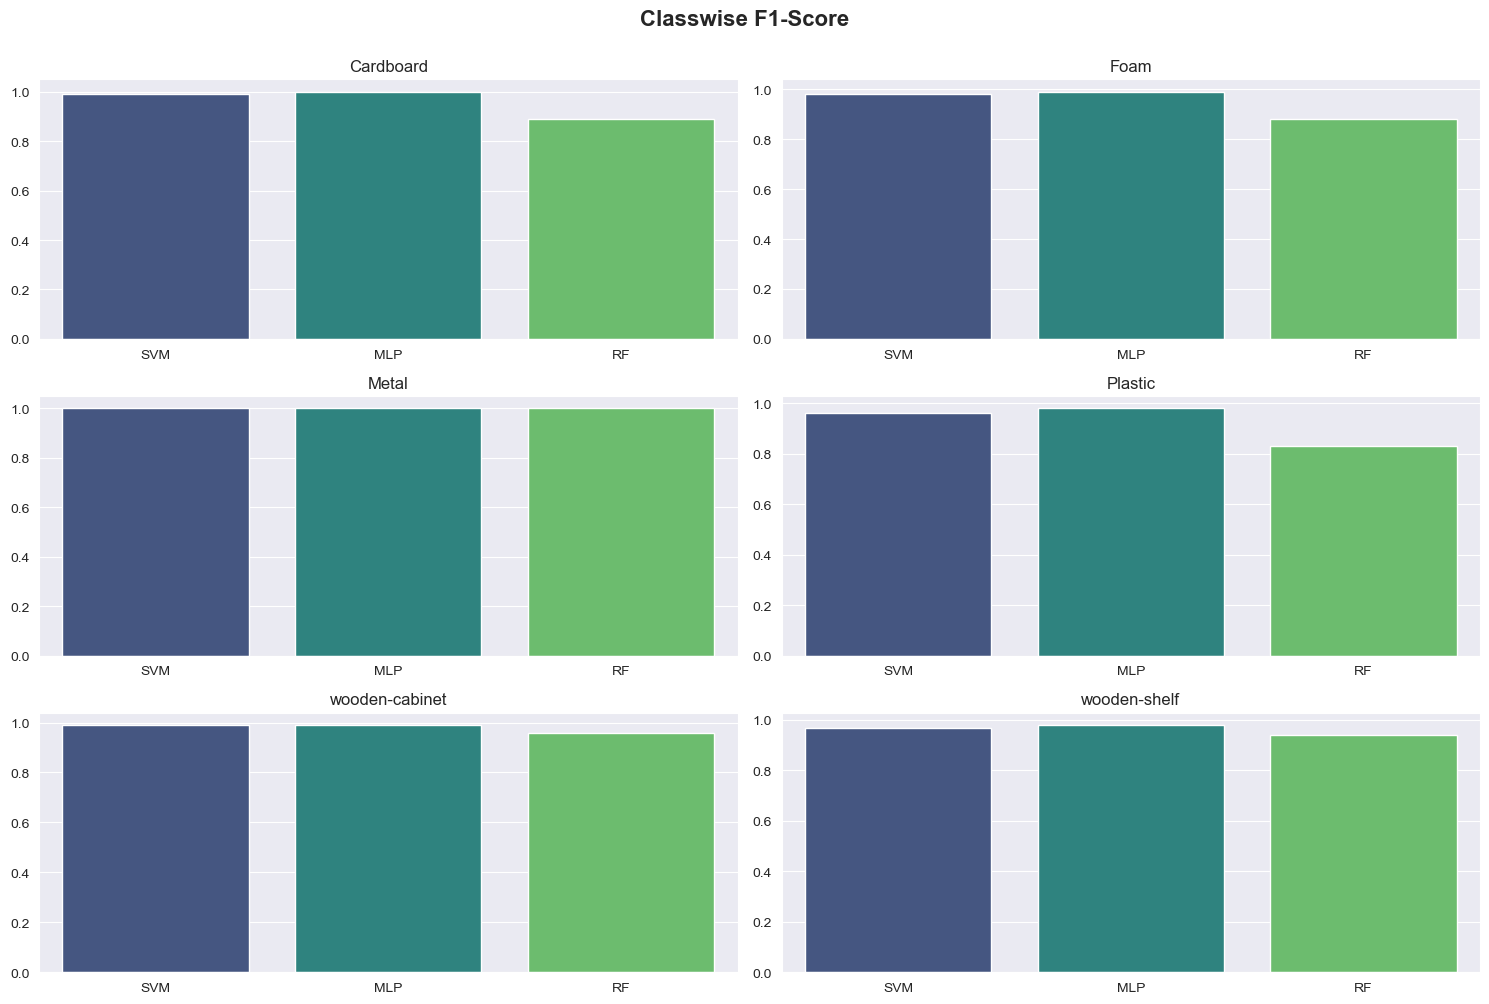

In [157]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # Adjust figsize as needed


row_values = f1_df.iloc[0]
row_values = row_values.drop('Material')
sns.barplot(x=row_values.index, y=row_values.values, edgecolor='white', palette="viridis", ax=axes[0][0])
axes[0][0].set_title('Cardboard')

row_values = f1_df.iloc[1]
row_values = row_values.drop('Material')
sns.barplot(x=row_values.index, y=row_values.values, edgecolor='white', palette="viridis", ax=axes[0][1])
axes[0][1].set_title('Foam')

row_values = f1_df.iloc[2]
row_values = row_values.drop('Material')
sns.barplot(x=row_values.index, y=row_values.values, edgecolor='white', palette="viridis", ax=axes[1][0])
axes[1][0].set_title('Metal')

row_values = f1_df.iloc[3]
row_values = row_values.drop('Material')
sns.barplot(x=row_values.index, y=row_values.values, edgecolor='white', palette="viridis", ax=axes[1][1])
axes[1][1].set_title('Plastic')

row_values = f1_df.iloc[4]
row_values = row_values.drop('Material')
sns.barplot(x=row_values.index, y=row_values.values, edgecolor='white', palette="viridis", ax=axes[2][0])
axes[2][0].set_title('wooden-cabinet')

row_values = f1_df.iloc[5]
row_values = row_values.drop('Material')
sns.barplot(x=row_values.index, y=row_values.values, edgecolor='white', palette="viridis", ax=axes[2][1])
axes[2][1].set_title('wooden-shelf')

plt.suptitle('Classwise F1-Score', fontsize=16, y=1, fontweight='bold') 
plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()

In [154]:
sns.color_palette("viridis")

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [153]:
num_colors = 3
color_palette = sns.color_palette("viridis", n_colors=num_colors)
color_palette

[(0.229739, 0.322361, 0.545706),
 (0.127568, 0.566949, 0.550556),
 (0.369214, 0.788888, 0.382914)]